# Predicting heart disease using ML

# 1. Problem Definition

In a statement, 
Given clinical parameter about a patient, can we predict whether or not they have heart disease ?


# 2. Data
There data are available on Kaggle.

# 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

# 4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concer

chol - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results

0: Nothing to note

1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more

slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

thal - thalium stress result

1,3: normal

6: fixed defect: used to be defect but ok now

7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

In [1]:
# tools import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
# model from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

In [4]:
# load data
df = pd.read_csv("heart-disease.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape

(303, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# data are numeric ans not null well 

In [10]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

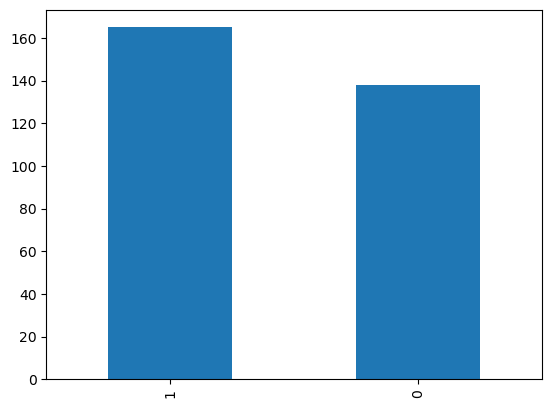

In [11]:
df["target"].value_counts().plot(kind="bar");

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Finding patterns on difference colomns

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
pd.crosstab(df.target,df.sex)
# here 75% woman are heart-disease

sex,0,1
target,,
0,24,114
1,72,93


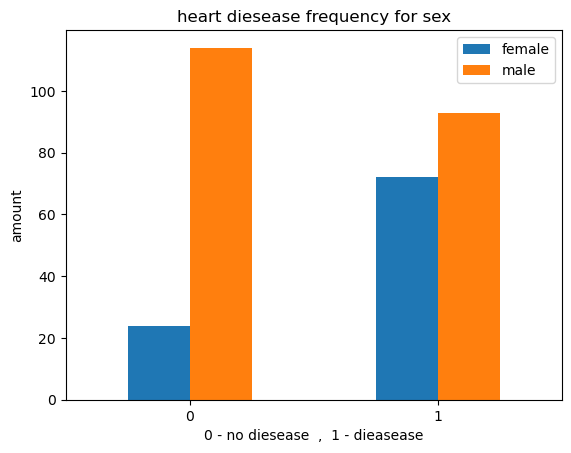

In [16]:
pd.crosstab(df.target,df.sex).plot(kind="bar");
plt.title("heart diesease frequency for sex")
plt.xlabel("0 - no diesease  ,  1 - dieasease")
plt.ylabel("amount")
plt.legend(["female","male"])
plt.xticks(rotation=0);

In [17]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [18]:
# compare age, max heart rate and target

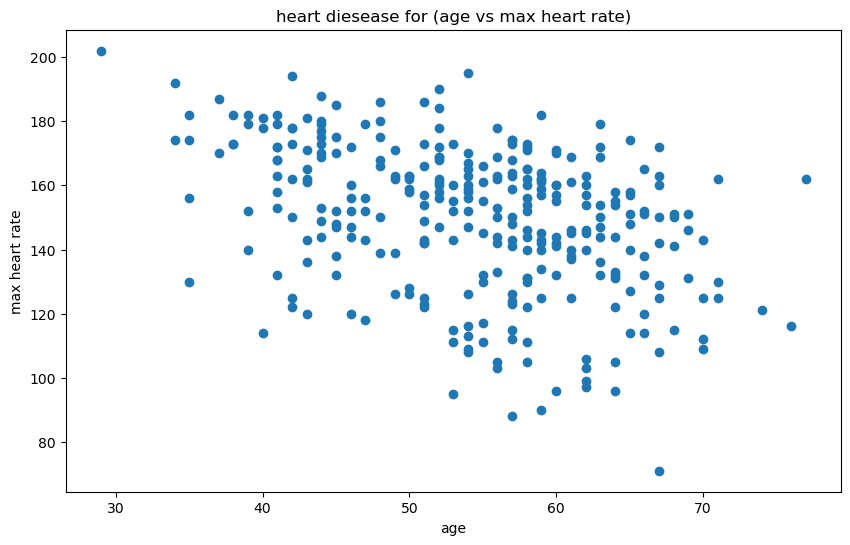

In [19]:
plt.figure(figsize=(10,6))

plt.scatter(df.age,
            df.thalach);
plt.title("heart diesease for (age vs max heart rate)")
plt.xlabel("age")
plt.ylabel("max heart rate")
# plt.legend(["disease","no disease"])
plt.xticks(rotation=0);

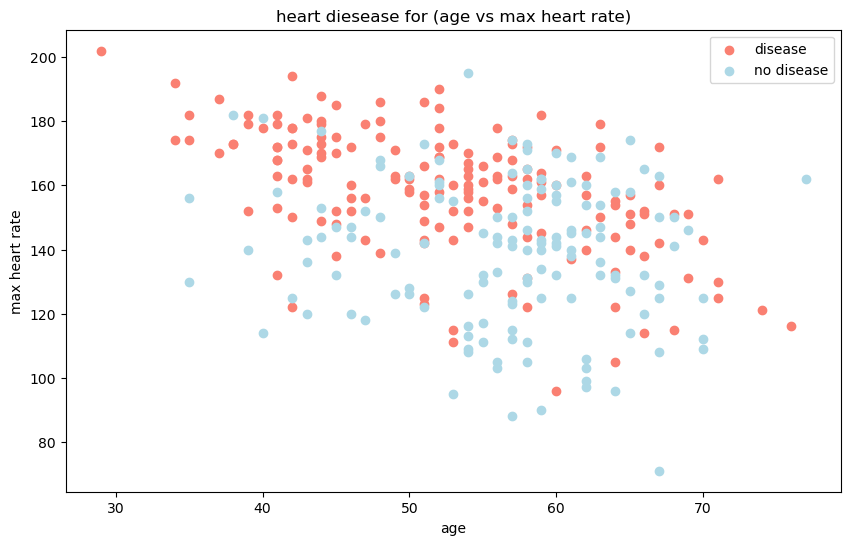

In [20]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c = "salmon");

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "lightblue");

plt.title("heart diesease for (age vs max heart rate)")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["disease","no disease"])
plt.xticks(rotation=0);

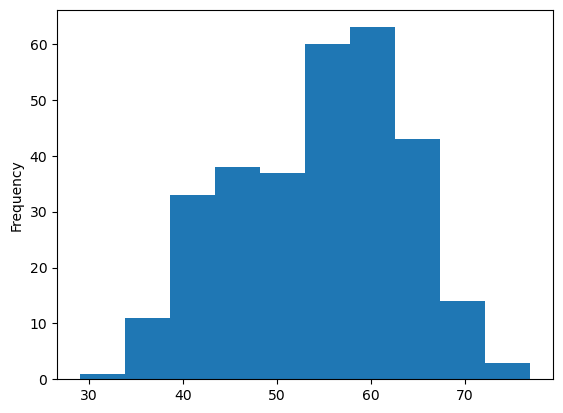

In [21]:
df.age.plot.hist();

In [22]:
# chest pain vs heart-disease

In [23]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


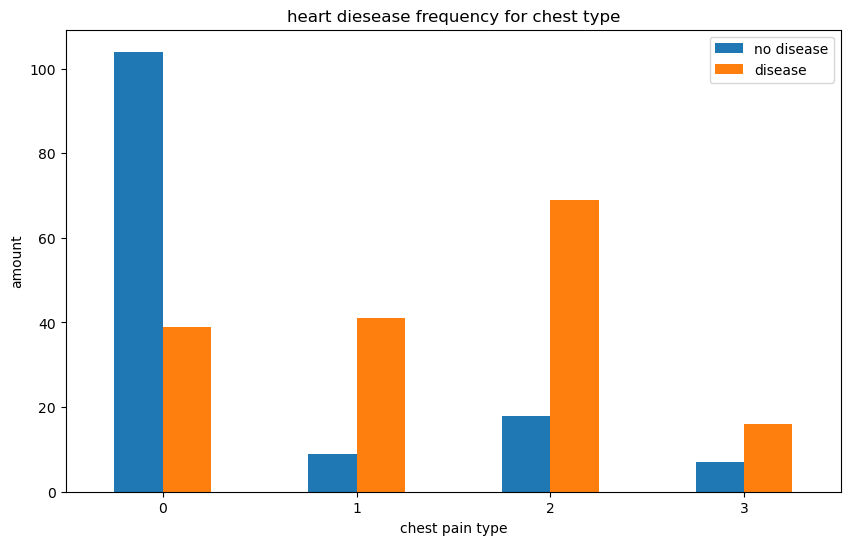

In [24]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6))

plt.title("heart diesease frequency for chest type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0);

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# make a correlation matarix

In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


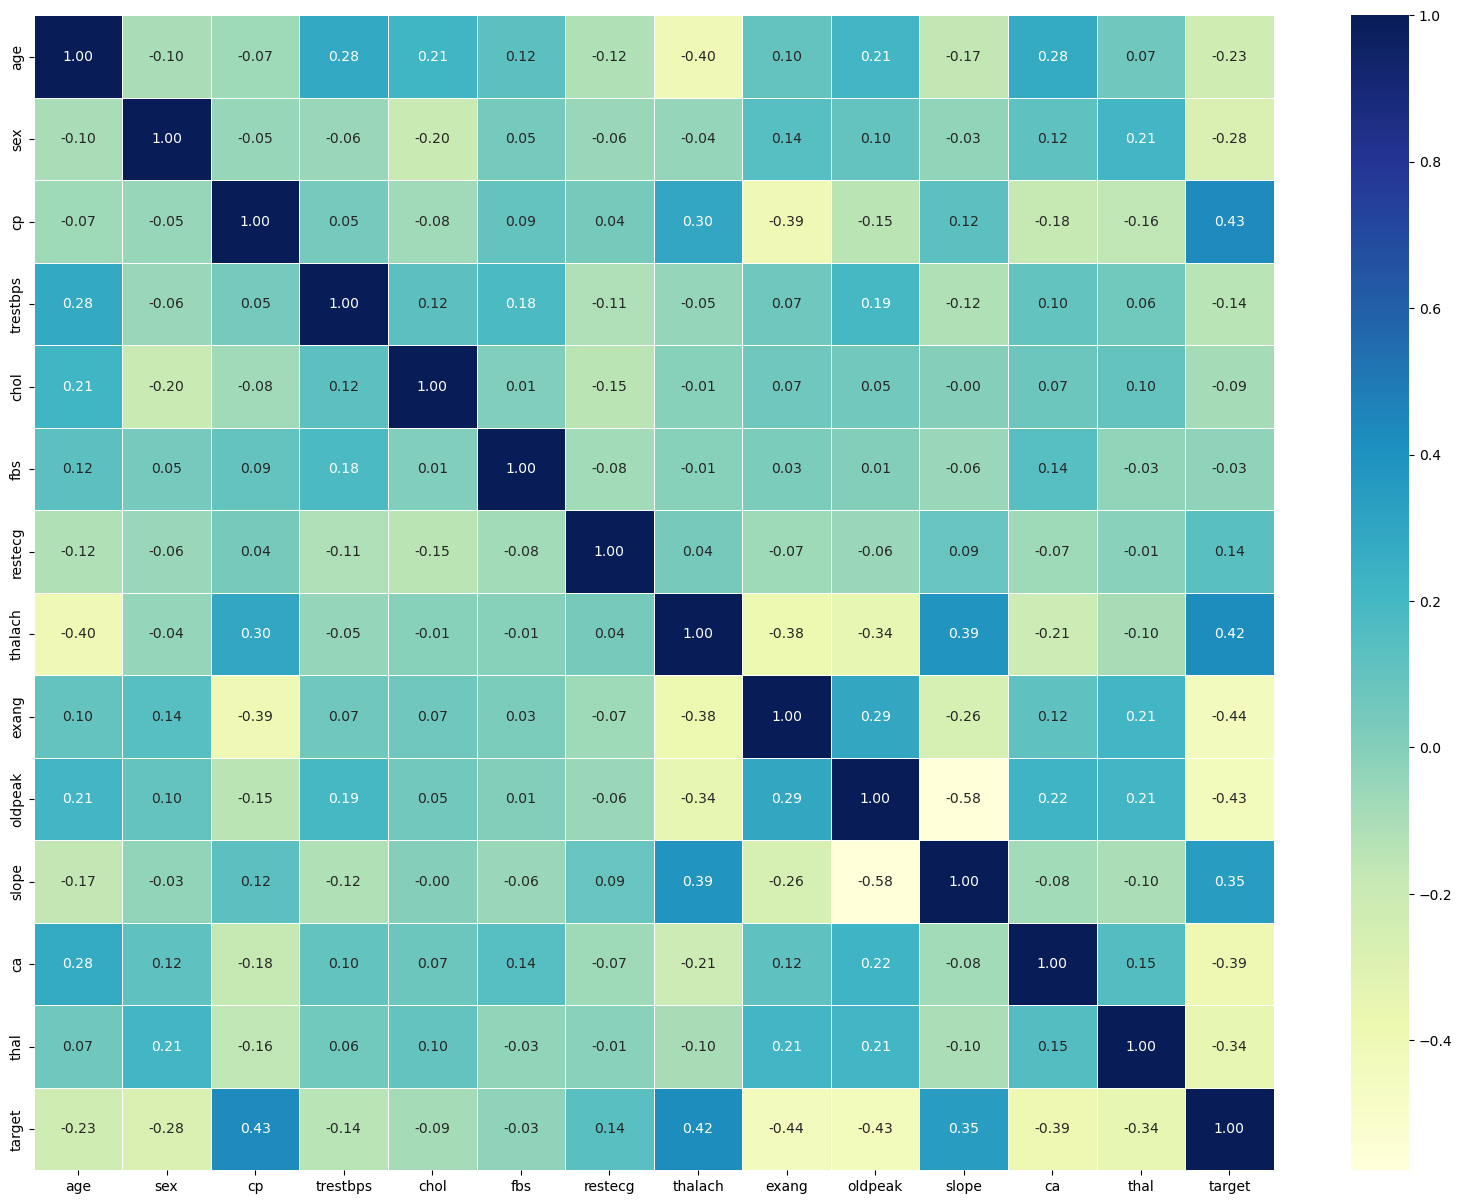

In [28]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [30]:
# target vs exang - t ~ 1/e

In [31]:
pd.crosstab(df.target,df.exang)

exang,0,1
target,,
0,62,76
1,142,23


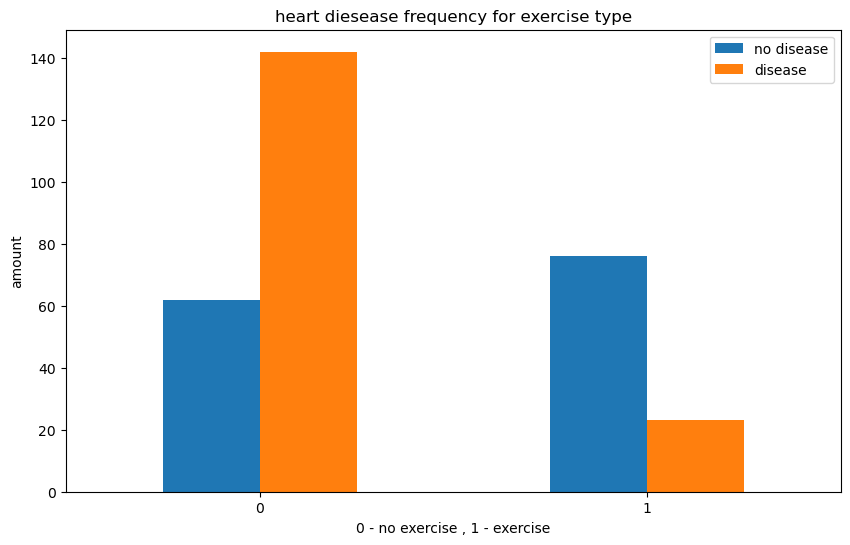

In [35]:
pd.crosstab(df.exang,df.target).plot(kind="bar",
                                     figsize=(10,6));
plt.title("heart diesease frequency for exercise type")
plt.xlabel("0 - no exercise , 1 - exercise")
plt.ylabel("amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0);

In [36]:
# target vs oldpeak - t ~ 1/oldpeak

In [39]:
pd.crosstab(df.target,df.oldpeak)

oldpeak,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,3.2,3.4,3.5,3.6,3.8,4.0,4.2,4.4,5.6,6.2
target,,,,,,,,,,,,,,,,,,,,,
0,25,3,3,1,1,1,4,0,6,2,...,2,3,0,4,1,3,1,1,1,1
1,74,4,9,2,8,4,10,1,7,1,...,0,0,1,0,0,0,1,0,0,0


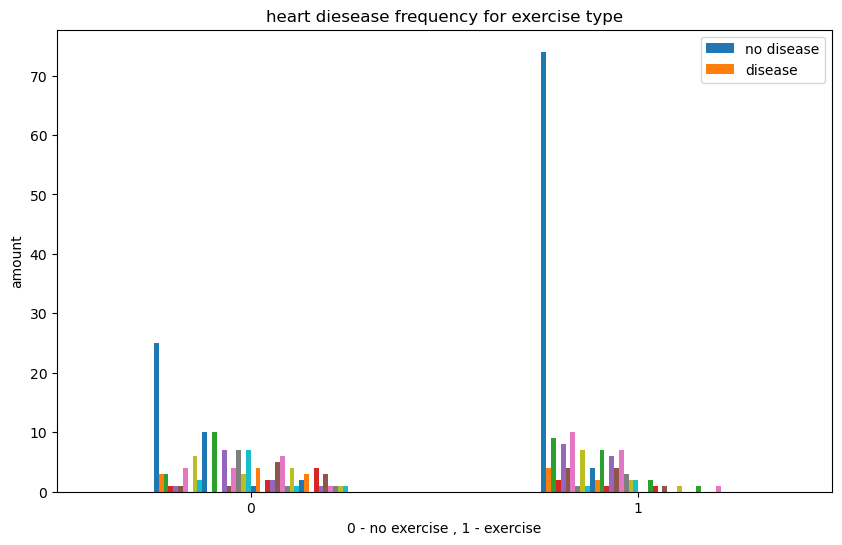

In [40]:
pd.crosstab(df.target,df.oldpeak).plot(kind="bar",
                                     figsize=(10,6));
plt.title("heart diesease frequency for exercise type")
plt.xlabel("0 - no exercise , 1 - exercise")
plt.ylabel("amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0);

# no more relation show in graph

# 5. Modelling

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
# Split data into x and y

x = df.drop("target",axis=1)

y = df["target"]

In [43]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [45]:
len(y),len(x)

(303, 303)

In [47]:
y.shape , x.shape

((303,), (303, 13))

In [48]:
y.info , x.info

(<bound method Series.info of 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64>,
 <bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1  

In [50]:
# Split data into train and test

np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [51]:
len(x_train) , len(x_test) , len(y_train) , len(y_test) 

(242, 61, 242, 61)

In [52]:
# Time to train a model and find the patterns from it using train dataset

In [53]:
# We try 6 different machine learning model


# 1. Support vector machine (svc)
# 2. Logistic Regression 
# 3. K-Nearest Neghbours classifier (KNN)
# 4. Decision Tree
# 5. Random forest classifier
# 6. Naive bayes

In [95]:
# create data frame model,accuracy,actualvalues

# result_df = pd.DataFrame({'model','accuracy','actual'})
# result_df

model = []
accuracy = []

In [96]:
# 1. Support vector machine (svc)
from sklearn.svm import LinearSVC

np.random.seed(42)

x = df.drop("target",axis=1)
y = df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = LinearSVC(max_iter=10000)

clf.fit(x_train,y_train)

C:\Users\Pradip Jaliya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=10000)

In [97]:
SVMscore = clf.score(x_test,y_test)

In [98]:
model.append("SVM")
accuracy.append(round(SVMscore*100,2))

In [99]:
# 2. Logistic Regression 
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

x = df.drop("target",axis=1)
y = df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = LogisticRegression(max_iter=100)

clf.fit(x_train,y_train)

C:\Users\Pradip Jaliya\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
LRscore = clf.score(x_test,y_test)

In [101]:
model.append("Logistic Regression")
accuracy.append(round(LRscore*100,2))

In [102]:
# 3. K-Nearest Neghbours classifier (KNN)
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

x = df.drop("target",axis=1)
y = df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = KNeighborsClassifier()

clf.fit(x_train,y_train)

KNeighborsClassifier()

In [103]:
KNNscore = clf.score(x_test,y_test)
model.append("KNN")
accuracy.append(round(KNNscore*100,2))

In [104]:
# 4. Decision Tree
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

x = df.drop("target",axis=1)
y = df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = DecisionTreeClassifier()

clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [105]:
DTscore = clf.score(x_test,y_test)
model.append("Decision Tree")
accuracy.append(round(DTscore*100,2))

In [106]:
# 5. Random forest classifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = df.drop("target",axis=1)
y = df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
RFCscore = clf.score(x_test,y_test)
model.append("Random Forest Classifier")
accuracy.append(round(RFCscore*100,2))

In [108]:
# 6. Naive bayes
from sklearn.naive_bayes import GaussianNB

np.random.seed(42)

x = df.drop("target",axis=1)
y = df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = GaussianNB()

clf.fit(x_train,y_train)

GaussianNB()

In [109]:
GNBscore = clf.score(x_test,y_test)
model.append("Naive bayes")
accuracy.append(round(GNBscore*100,2))

In [110]:
result_df = pd.DataFrame({'model':model,'accuracy':accuracy})
result_df

,model,accuracy
0,SVM,86.89
1,Logistic Regression,88.52
2,KNN,68.85
3,Decision Tree,81.97
4,Random Forest Classifier,85.25
5,Naive bayes,86.89


In [111]:
models_dic = {"SVM":LinearSVC(),
              "LR":LogisticRegression(),
              "KNN":KNeighborsClassifier(),
              "DT":DecisionTreeClassifier(),
              "RFC":RandomForestClassifier(),
              "NB":GaussianNB()}

In [116]:
def fit_and_score(models_dic,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    models_score = {}
    for name,model in models_dic.items():
        model.fit(x_train,y_train)
        models_score[name]=round(model.score(x_test,y_test)*100,2)
    return models_score

In [117]:
models_score = fit_and_score(models_dic,x_train,x_test,y_train,y_test)

C:\Users\Pradip Jaliya\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Pradip Jaliya\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
models_score

{'SVM': 86.89,
 'LR': 88.52,
 'KNN': 68.85,
 'DT': 83.61,
 'RFC': 83.61,
 'NB': 86.89}

In [119]:
df_models_score = pd.DataFrame(models_score,index=["accuracy"])

In [120]:
df_models_score

,SVM,LR,KNN,DT,RFC,NB
accuracy,86.89,88.52,68.85,83.61,83.61,86.89


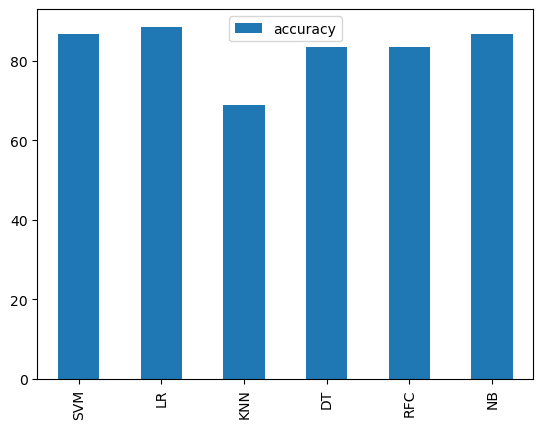

In [123]:
df_models_score.T.plot.bar();

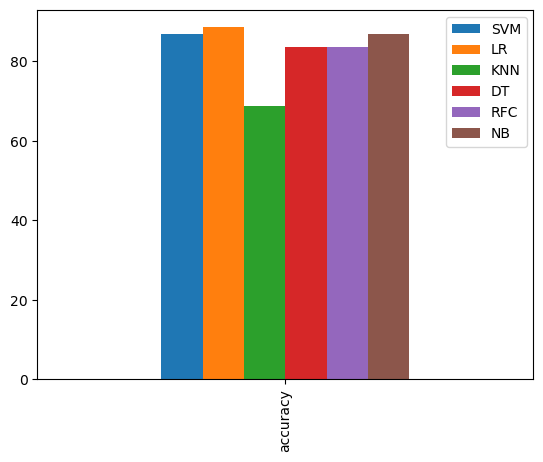

In [124]:
df_models_score.plot.bar();

Let's look following :
* hyperpatameter tuning
* feature importance
* confusion matrix
* cross validation
* precision
* recall
* F1 score
* classifiction report
* ROC curve
* Area under the curve (AUC)

### Hyperpatameter tuning

In [137]:
# let's try KNN
# change neighbors

KNN_train_score = []
KNN_test_score =[]

neighbors = range(1,25)

for i in neighbors :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    KNN_train_score.append(knn.score(x_train,y_train))
    KNN_test_score.append(knn.score(x_test,y_test))
    


In [138]:
KNN_train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405,
 0.6694214876033058,
 0.7024793388429752,
 0.6735537190082644]

In [139]:
KNN_test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361]

max : 75.41%


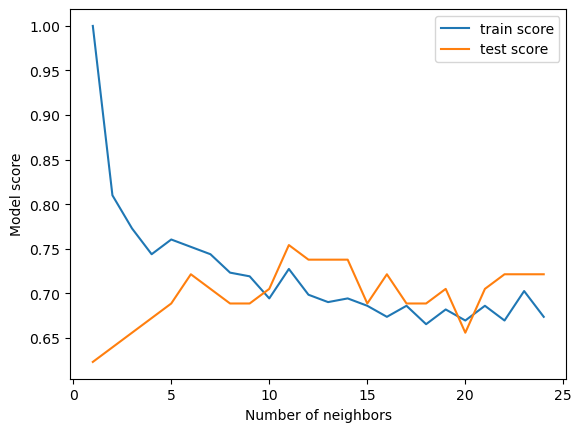

In [145]:
# create plot
plt.plot(neighbors,KNN_train_score,label="train score")
plt.plot(neighbors,KNN_test_score,label="test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();
print(f"max : {max(KNN_test_score)*100:.2f}%")

In [150]:
# Logistic regression
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver":["liblinear"]}

# random forest
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth" : [None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}


In [151]:

np.random.seed(42)

# Logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [152]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [153]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [154]:
# random forest

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [155]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [156]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [157]:
models_score

{'SVM': 86.89,
 'LR': 88.52,
 'KNN': 68.85,
 'DT': 83.61,
 'RFC': 83.61,
 'NB': 86.89}

In [158]:
# RFC score impove 3 to 4 % it's good 